#**Importing Libraries and Mounting Google Drive**

In [ ]:
import pandas as pd
import numpy as np

#Mounting to google Drive
from google.colab import drive
drive.mount('/content/drive')

#Importing Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Importing Train Test Splitting
from sklearn.model_selection import train_test_split

#Importing Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Importing: Encoding Categoricol Values, Standardizing the Data, Oversampling and UnderSampling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

#Importing K-Fold Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold

#Importing Machine learning Model
from sklearn.ensemble import RandomForestClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1: Creating Dataframe and Viewing the Dataset**

In [ ]:
#Reads CSV file from google drive into a dataframe, and displays the first 5 rows
df = pd.read_csv('/content/drive/MyDrive/CMP6202/datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **2: Understanding the Dataset**

In [ ]:
# Shows the data type of the features
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# Shows information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Shows the number of columns and rows of the dataset
df.shape

(5110, 12)

In [ ]:
# Shows first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Shows last 5 Rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Shows number of unique values in each column
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# Shows a description of the dataframe
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **3: Univariate Analysis**

<Axes: ylabel='count'>

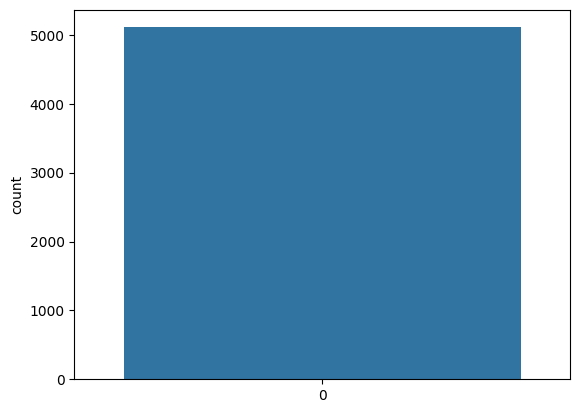

In [ ]:
#Visualises the count of a stroke not taken place
stroke_check = df['stroke']
plt.figure()
sns.countplot(data = stroke_check)

<Axes: xlabel='stroke', ylabel='count'>

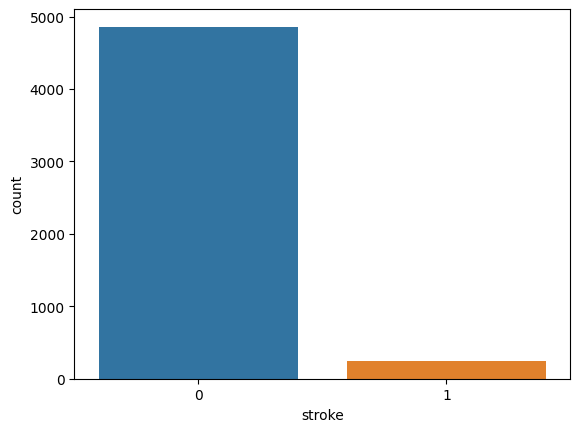

In [ ]:
# Visualising the Stroke Column
sns.countplot(data = df, x='stroke')

<Axes: ylabel='stroke'>

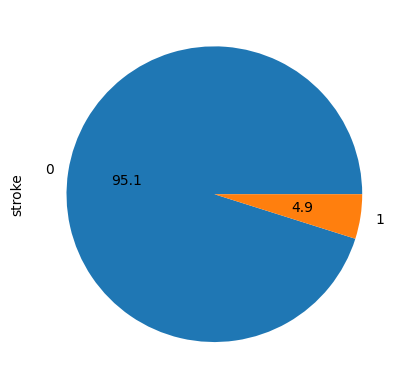

In [ ]:
#Visualising the stroke column as a pie chart and showing the percentage
df['stroke'].value_counts().plot.pie(autopct='%.1f')

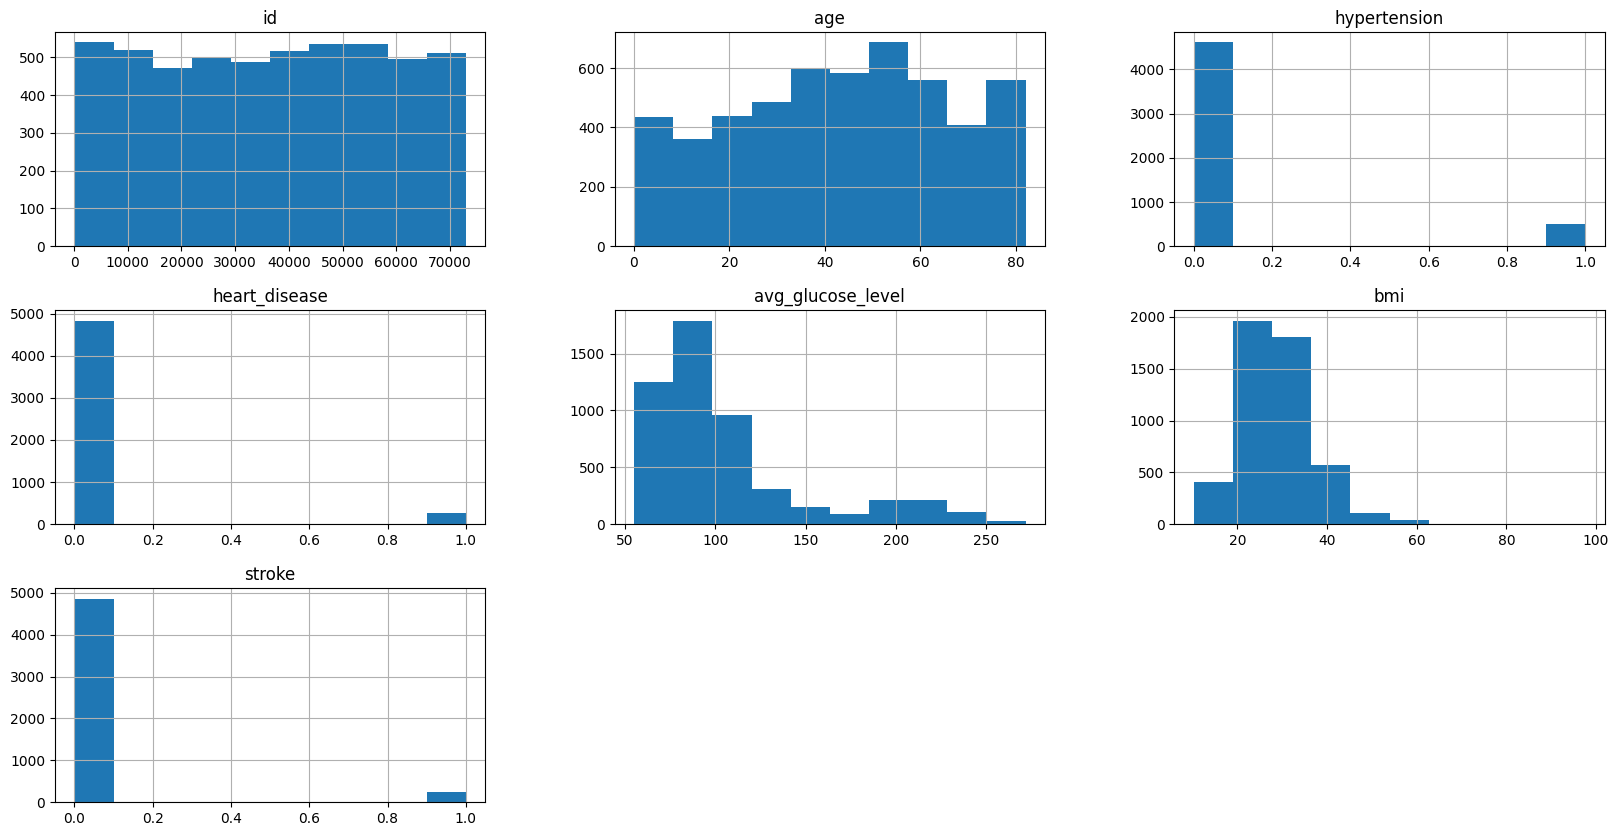

In [ ]:
#  Visualising the  features in the dataset as a histogram
df.hist(figsize=(20,10))
plt.show()

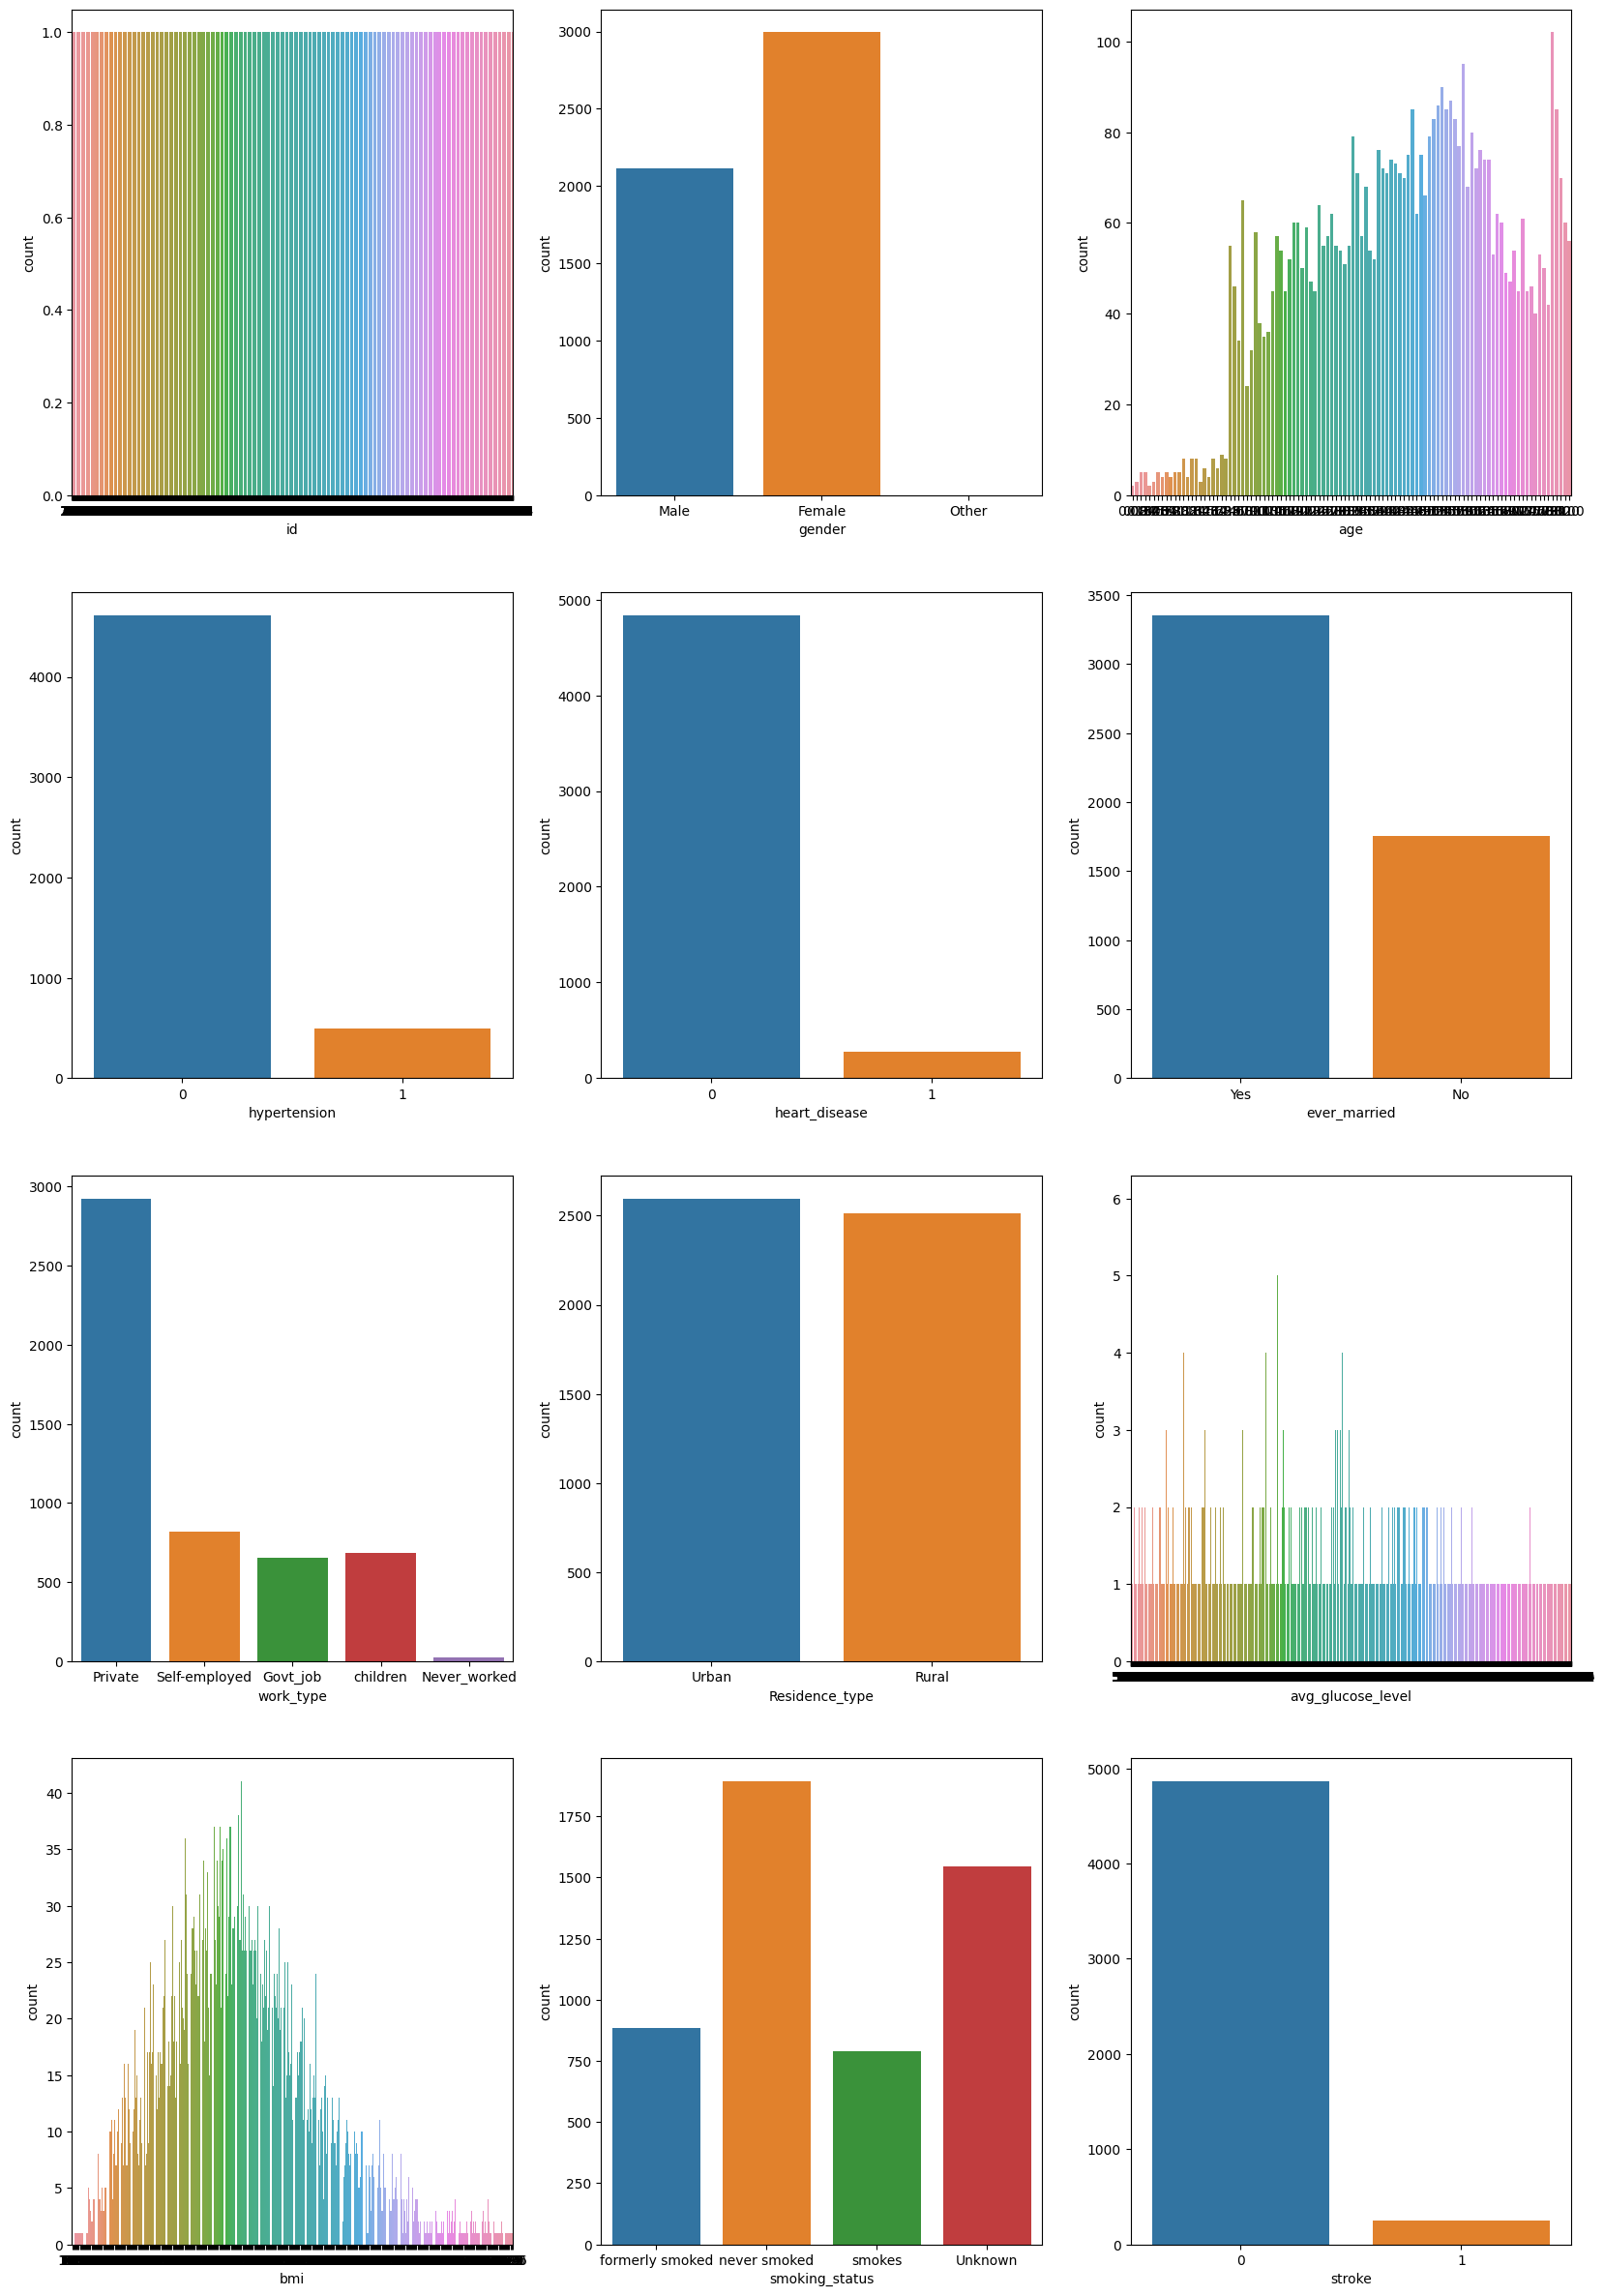

In [ ]:
# Countplot of all features
fig, axs = plt.subplots(nrows=4,ncols=3, figsize=(20,30))
rownum = 0
for col in df[1:]:
    sns.countplot(data=df,x=df[col],ax=axs[rownum//3][rownum%3])
    rownum += 1


<Axes: xlabel='hypertension', ylabel='count'>

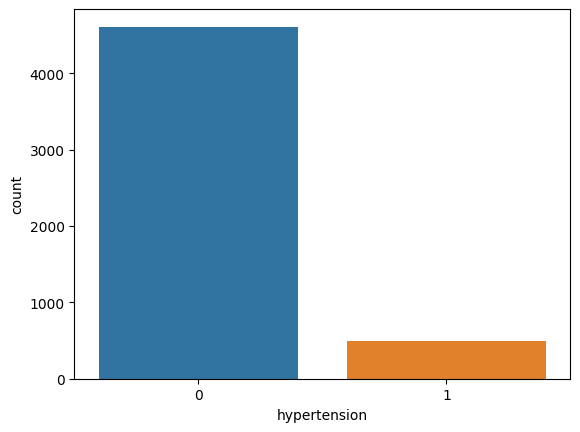

In [ ]:
#countplot of hypertension
sns.countplot(data = df, x='hypertension')

<Axes: xlabel='age', ylabel='count'>

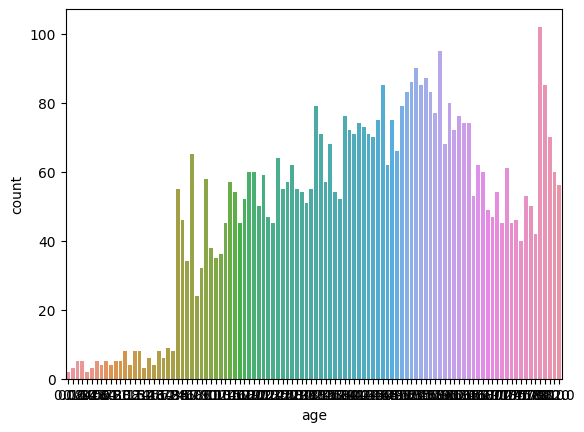

In [ ]:
# Viewing Countplot of age
sns.countplot(data = df, x='age')

<Axes: xlabel='bmi'>

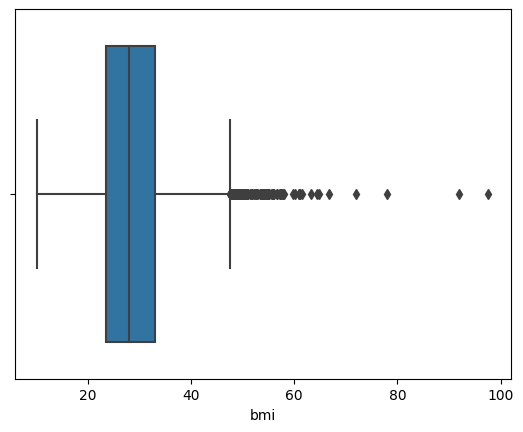

In [ ]:
# Boxplot of BMI to show outliers
sns.boxplot(x=df['bmi'], orient='h')

<Axes: xlabel='avg_glucose_level'>

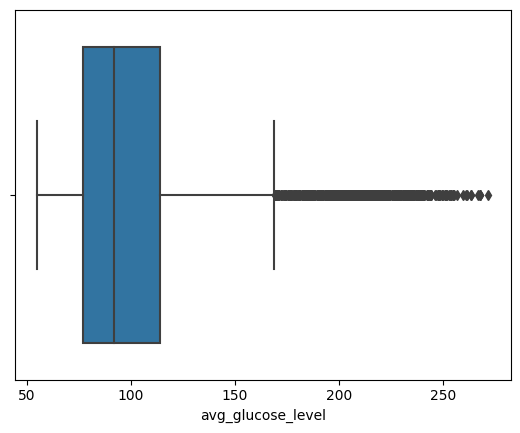

In [ ]:
# Boxplot of avg_glucose_level showing outliers
sns.boxplot(x=df['avg_glucose_level'], orient='h')

# **4: Multivariate Analysis**

<ipython-input-95-820a70880034>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


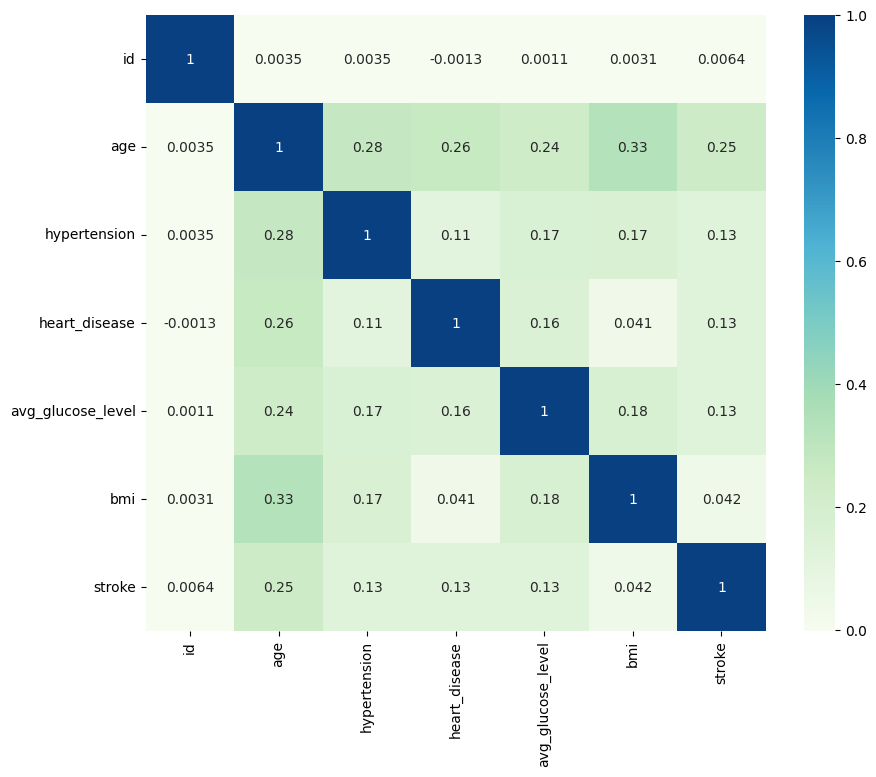

In [ ]:
# Heatmap Showing if any features are highly correlated
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='GnBu')
plt.show()

<Figure size 1000x800 with 0 Axes>

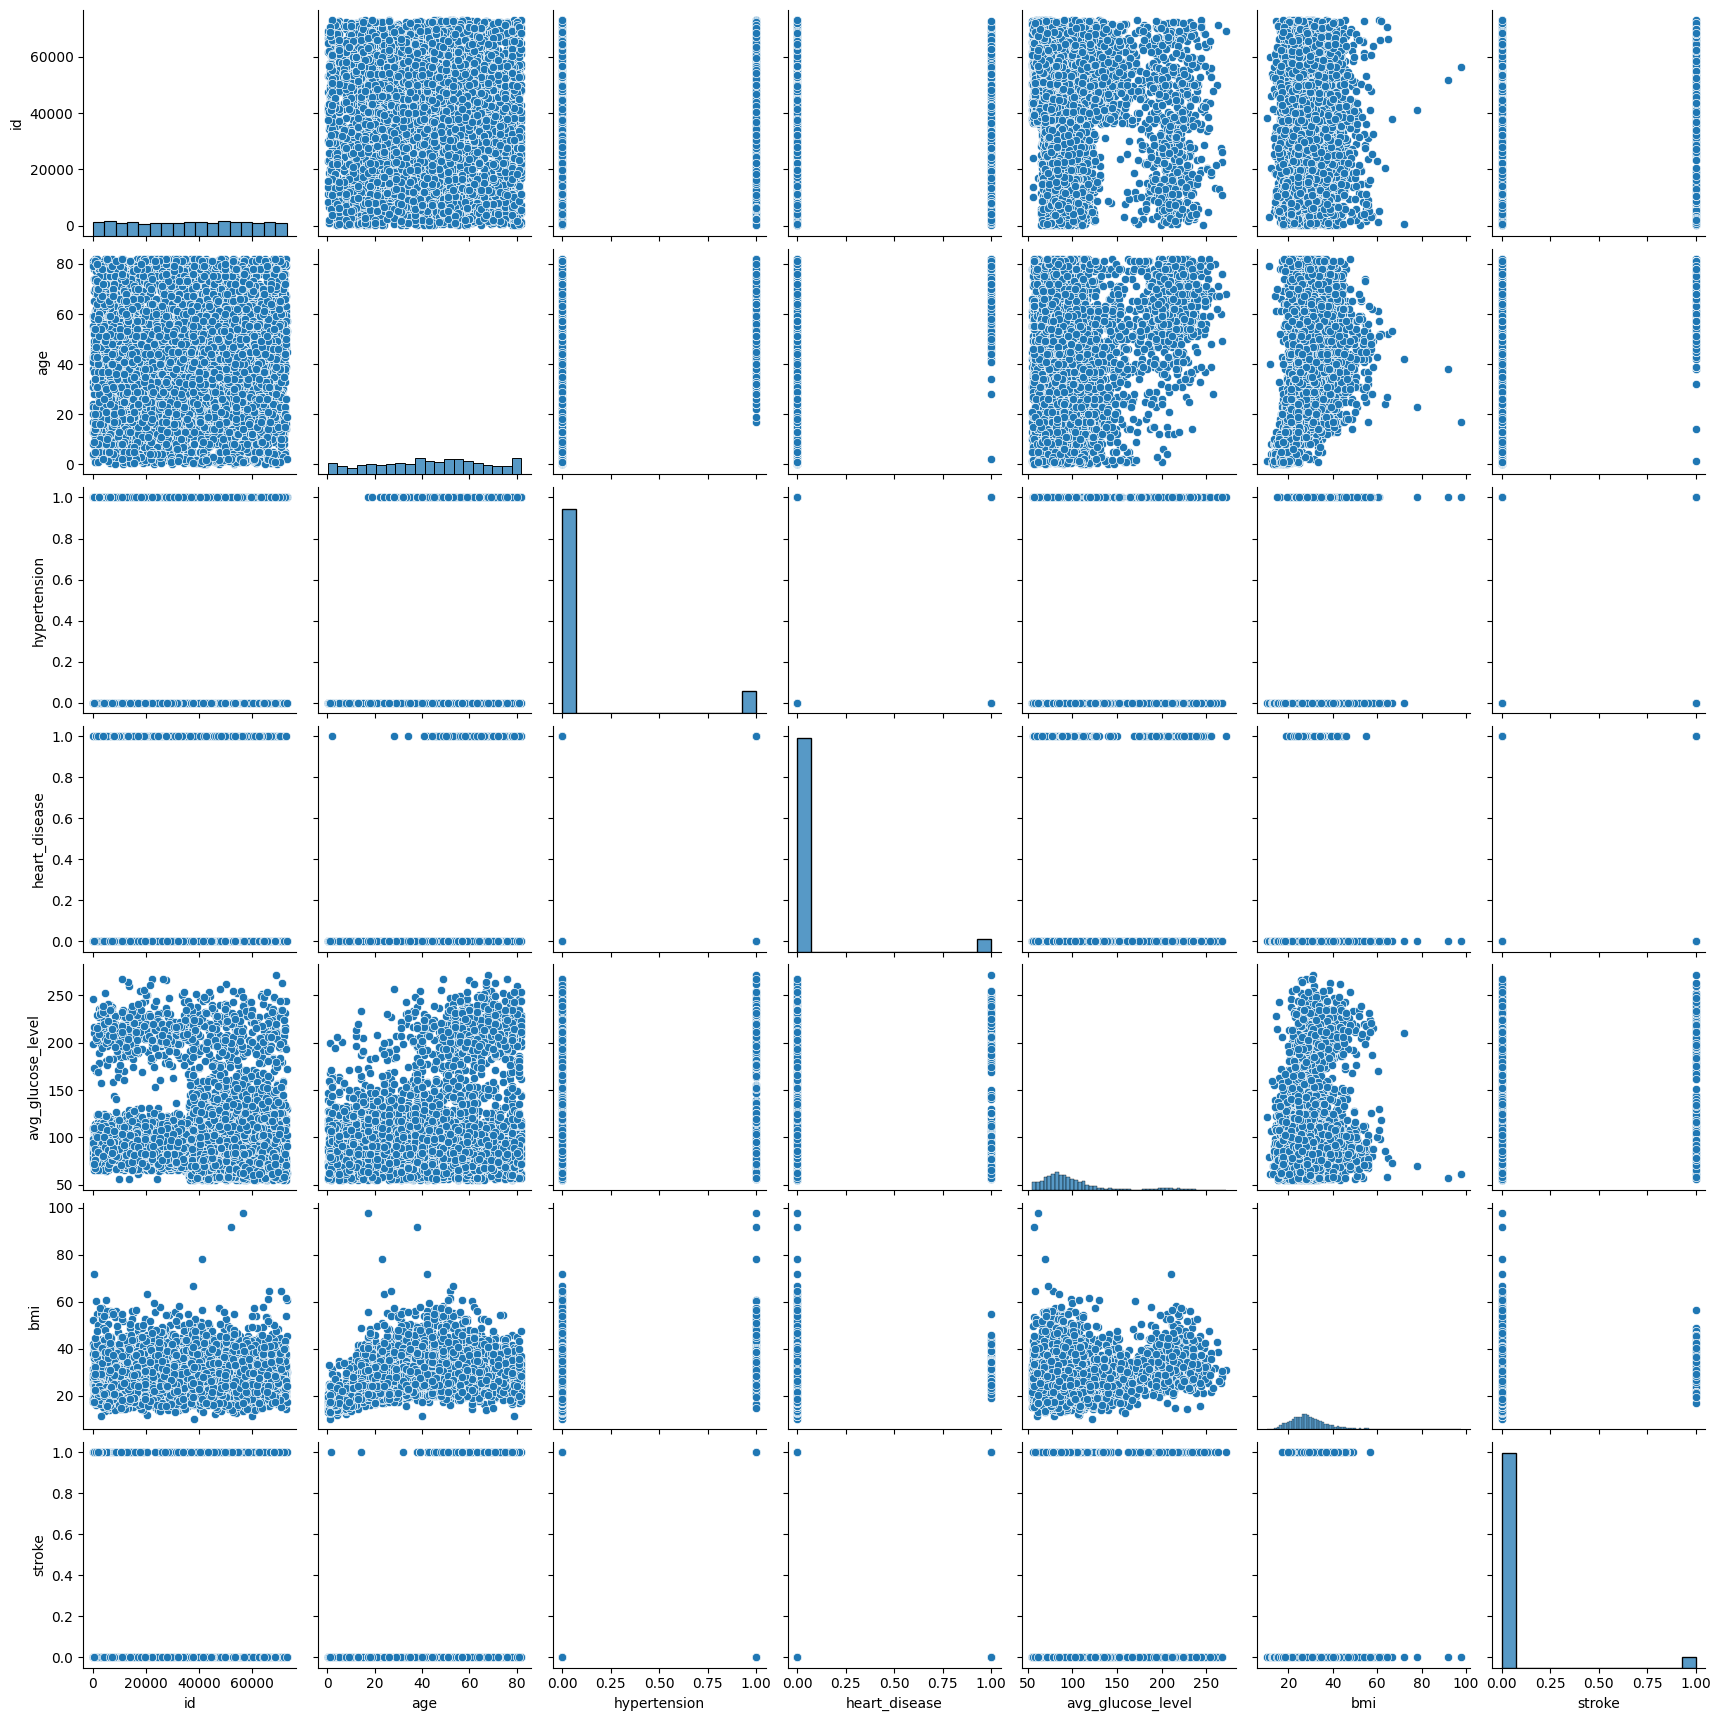

In [ ]:
#Plot of all features to show relationships between vairables of the dataset
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

# **Bivariate Analysis**

<Axes: xlabel='hypertension', ylabel='count'>

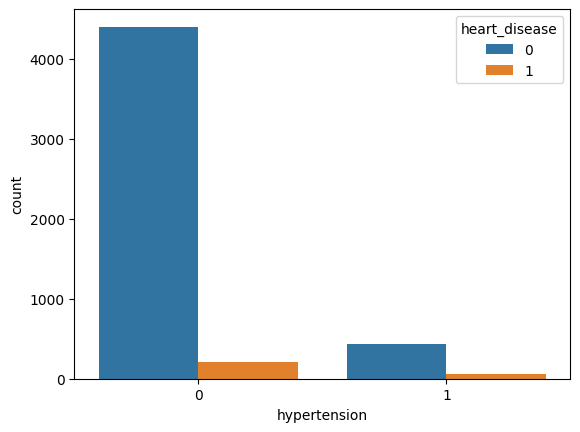

In [ ]:
# Viewing Hypetension and heart_disease countplot correlation
sns.countplot(
    hue="heart_disease",
    x="hypertension",
    data=df)

<Axes: xlabel='hypertension', ylabel='count'>

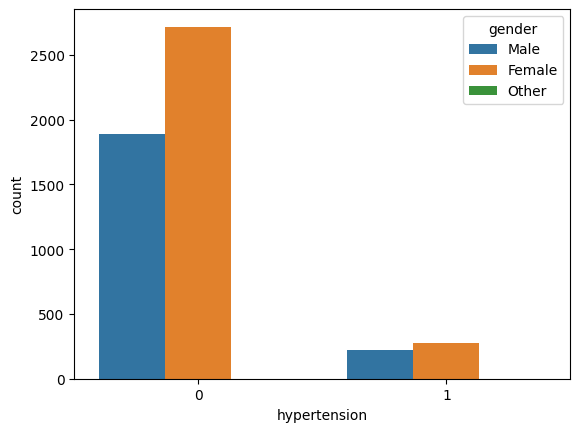

In [ ]:
# Viewing Hypetension and gender countplot correlation
sns.countplot(
    hue="gender",
    x="hypertension",
    data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

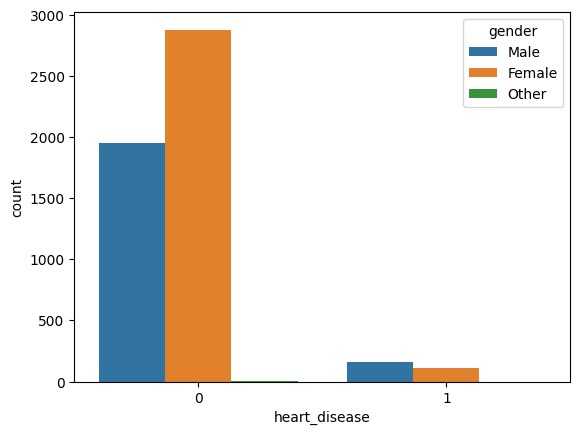

In [ ]:
# Viewing heart_disease and gender countplot correlation
sns.countplot(
    hue="gender",
    x="heart_disease",
    data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

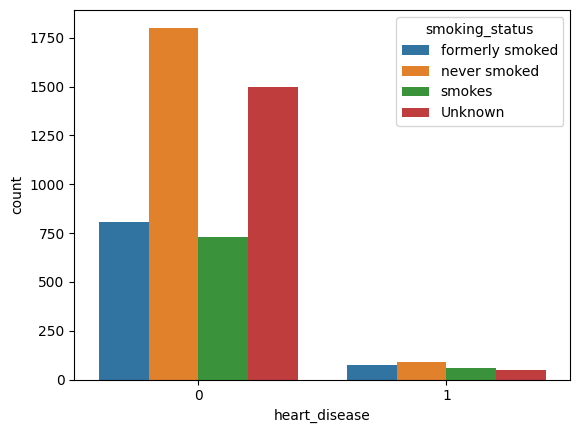

In [ ]:
# Viewing heart_disease and smoking_status countplot correlation
sns.countplot(
    hue="smoking_status",
    x="heart_disease",
    data=df)

<Axes: xlabel='hypertension', ylabel='count'>

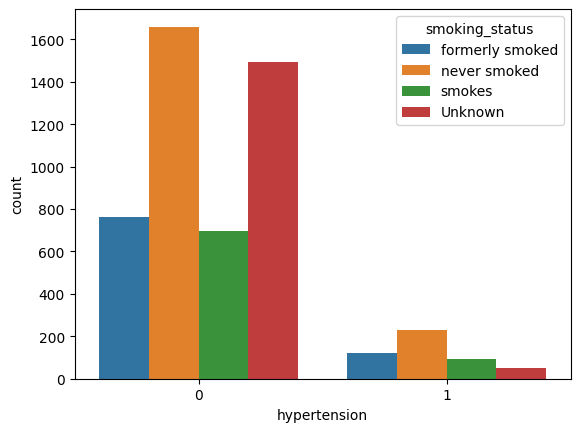

In [ ]:
# Viewing Hypetension and smoking_status countplot correlation
sns.countplot(
    hue="smoking_status",
    x="hypertension",
    data=df)

<Axes: xlabel='hypertension', ylabel='count'>

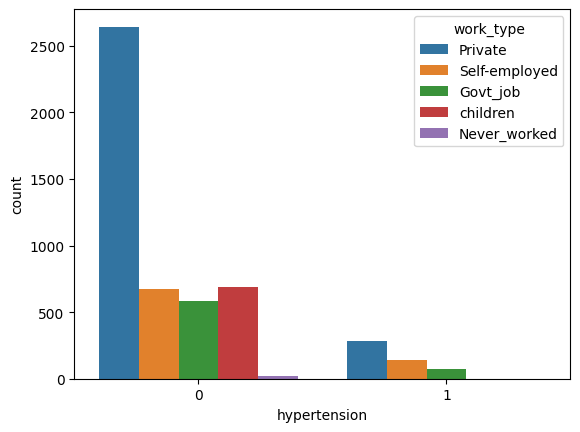

In [ ]:
# Viewing worktype and hypertension countplot correlation
sns.countplot(
    hue="work_type",
    x="hypertension",
    data=df)

# **5: Removing Unwanted Columns**

In [ ]:
#Removing Unwanted Column and confirming the column has been removed
df = df.drop('id', axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **6: Enconding Categorical Values**

In [ ]:
# Changing all the Columns that contain Categorical values into Numerical Values
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [ ]:
# Showing the dataset columns have been encoded
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# **7: Missing Values**

In [ ]:
# Checking the Amount of Missing Values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## The count of missing values is 201 for bmi, only this column contains missing values and out of 5110 rows only 201 rows contain a missing value in the bmi column, therefore i can just remove these rows, as it wont make a significant impact on the models performence.

In [ ]:
# Removes the rows that contain missing values and confirms this
df.dropna(inplace=True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Showing the dataset does not contain missing values
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


# **8: Changes in rows and columns of the Dataset**

In [ ]:
# Shows the updated column and rows of the dataset
df.shape

(4909, 11)

# **9: Splitting the Dataset into Train and Test split**

In [ ]:
# Removing the column Stroke and assigning it to the variable X and displaying the first 5 rows of X
X = df.drop(columns='stroke', axis=1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [ ]:
# Assigning the stroke column to the variable y and displaying the first 5 rows
y = df['stroke']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

## Splitting the dataset into train and test split with a ratio of 80%:20%, 80% training and 20% testing. Random state of 42 to randomise order of the data to prevent bias and data leak. And Understanding the splitting of the data.


In [ ]:
#Splitting the data x and y into train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
# Shows the columns and rows of X
X.shape

(4909, 10)

In [ ]:
# Shows columns and rows of the X_train
X_train.shape

(3927, 10)

In [ ]:
# Shows columns and rows of the X_test
X_test.shape

(982, 10)

In [ ]:
# Information about y_test
y_test

4336    0
3709    0
964     0
2647    0
3262    0
       ..
1022    0
205     1
3838    0
5010    0
1559    0
Name: stroke, Length: 982, dtype: int64

In [ ]:
# Understanding X_test
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4336,1,80.0,0,1,1,2,0,125.32,32.9,0
3709,0,42.0,0,0,0,2,1,84.03,31.4,2
964,1,66.0,1,0,1,2,0,74.90,32.1,2
2647,1,29.0,0,0,1,0,1,102.40,26.9,3
3262,1,47.0,0,0,1,2,0,88.49,22.2,3
...,...,...,...,...,...,...,...,...,...,...
1022,1,22.0,0,0,0,2,0,58.38,36.0,2
205,0,78.0,0,0,1,2,1,106.74,33.0,1
3838,1,56.0,0,0,1,3,1,122.73,37.5,1
5010,0,72.0,0,0,1,3,1,74.17,35.5,1


In [ ]:
#Understand y_test
y_test

4336    0
3709    0
964     0
2647    0
3262    0
       ..
1022    0
205     1
3838    0
5010    0
1559    0
Name: stroke, Length: 982, dtype: int64

# **10: Feature Scaling via Standardisation of the data**

In [ ]:
# Scaling the data using the StandardScaler method and comfiming that it has been scaled
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.82876865, -0.12265929, -0.3196265 , ..., -0.89044802,
         0.3065734 ,  0.58493758],
       [-0.82876865,  0.72186525, -0.3196265 , ..., -0.53286955,
         0.51320287, -1.29097084],
       [-0.82876865,  0.63296793, -0.3196265 , ...,  2.52603739,
         1.00394788,  0.58493758],
       ...,
       [-0.82876865,  0.45517329, -0.3196265 , ..., -0.32985871,
        -0.86863175, -0.35301663],
       [-0.82876865, -1.41167043, -0.3196265 , ..., -0.26541798,
        -1.0365182 , -1.29097084],
       [ 1.20406988,  0.89965989, -0.3196265 , ..., -1.06957523,
        -0.00337082, -0.35301663]])

In [ ]:
# Showing the X_test data has been scaled
X_test

array([[ 1.20406988,  1.65528711, -0.3196265 , ...,  0.45131618,
         0.52611721, -1.29097084],
       [-0.82876865, -0.03376197, -0.3196265 , ..., -0.47901873,
         0.33240208,  0.58493758],
       [ 1.20406988,  1.03300587,  3.12865171, ..., -0.68473338,
         0.42280248,  0.58493758],
       ...,
       [ 1.20406988,  0.58851927, -0.3196265 , ...,  0.39295902,
         1.12017696, -0.35301663],
       [-0.82876865,  1.29969783, -0.3196265 , ..., -0.70118153,
         0.86189011, -0.35301663],
       [-0.82876865,  0.45517329, -0.3196265 , ..., -0.73588039,
         4.90407924, -1.29097084]])

# **11: Modeling**

In [ ]:
# Fitting the model
clf_rf = RandomForestClassifier(n_estimators=200)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
#Predicting Seen data
y_pred = clf_rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Creates an array evaluating the models performence on Seen data
cm = confusion_matrix(y_train, y_pred)
cm

array([[3771,    0],
       [   0,  156]])

In [ ]:
# Showing Evaluation Metric Accuracy result from the model on Seen Data
rf_acc = accuracy_score(y_train, y_pred)
print(rf_acc)

1.0


In [ ]:
#Creates a table evaluating the models performence on Seen Data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00       156

    accuracy                           1.00      3927
   macro avg       1.00      1.00      1.00      3927
weighted avg       1.00      1.00      1.00      3927



In [ ]:
#Predicting UnSeen data
y_pred = clf_rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Creates an array evaluating the models performence on UnSeen data
cm = confusion_matrix(y_test, y_pred)
cm

array([[929,   0],
       [ 53,   0]])

In [ ]:
# Showing Evaluation Metric Accuracy result from the model on UnSeen Data
rf_acc = accuracy_score(y_test, y_pred)
print(rf_acc)

0.9460285132382892


In [ ]:
#Creates a table evaluating the models performence on UnSeen Data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **12: Further Improvements of the Model**

## OverSampling the target class to balance the dataset and Evaluate the Models Performence


In [ ]:
# Importing Smote and Counter
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
# Showing the value count of the stroke column before oversampling
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [ ]:
# Showing Mean results of the different classes 0,1
df.groupby('stroke').mean()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,0.409362,41.760451,0.083191,0.043191,0.642128,2.177872,0.506596,104.003736,28.823064,1.363830
1,0.425837,67.712919,0.287081,0.191388,0.889952,1.995215,0.521531,134.571388,30.471292,1.636364


In [ ]:
# Applying Smote and resamppling the training set to balance the data
sm = SMOTE(random_state=42)
X_sample, y_sample = sm.fit_resample(X_train, y_train)
X_sample2, y_sample2 = sm.fit_resample(X_test, y_test)

In [ ]:
# Show the Rows and Columns of the Balanced train dataset
X_sample.shape

(7542, 10)

In [ ]:
# Show the Rows of the Balanced train dataset
y_sample.shape

(7542,)

In [ ]:
# Show the Rows and Columns of the Balanced test dataset
X_sample2.shape

(1858, 10)

In [ ]:
# Show the Rows of the Balanced test dataset
y_sample2.shape

(1858,)

In [ ]:
# Showing the amount of occurence of class 1
y_sample==1

0       False
1       False
2       False
3       False
4       False
        ...  
7537     True
7538     True
7539     True
7540     True
7541     True
Name: stroke, Length: 7542, dtype: bool

In [ ]:
# Showing the amount of occurence of class 0
y_sample == 0

0        True
1        True
2        True
3        True
4        True
        ...  
7537    False
7538    False
7539    False
7540    False
7541    False
Name: stroke, Length: 7542, dtype: bool

In [ ]:
# Fitting the model with the oversampled data and predicting Seen Data
clf_rf_ref = RandomForestClassifier(n_estimators=200)
clf_rf_ref = clf_rf_ref.fit(X_sample,y_sample)
y_pred = clf_rf_ref.predict(X_sample)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Creates an array evaluating the models performence on Seen data
cm = confusion_matrix(y_sample, y_pred)
cm

array([[3771,    0],
       [   0, 3771]])

In [ ]:
# Showing Evaluation Metric Accuracy result from the model on Seen Data
print(classification_report(y_sample, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      7542
   macro avg       1.00      1.00      1.00      7542
weighted avg       1.00      1.00      1.00      7542



In [ ]:
#Predicting the Model on Unseen Data
y_pred = clf_rf_ref.predict(X_sample2)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Creates an array evaluating the models performence on UnSeen data
cm = confusion_matrix(y_sample2, y_pred)
cm

array([[904,  25],
       [297, 632]])

In [ ]:
#Creates a table evaluating the models performance on UnSeen Data
print(classification_report(y_sample2, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       929
           1       0.96      0.68      0.80       929

    accuracy                           0.83      1858
   macro avg       0.86      0.83      0.82      1858
weighted avg       0.86      0.83      0.82      1858



*****************************************

## Further Improving the Model using K-Fold Cross Validation

In [ ]:
#Importing Cross Validation
from sklearn.model_selection import cross_val_predict

In [ ]:
# Creating the K-Fold and showing the accuracy of each fold
#SEEN DATA
cv = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_score(RandomForestClassifier(), X_sample, y_sample, cv=cv)

array([0.96423841, 0.98543046, 0.97745358, 0.97480106, 0.97214854,
       0.97214854, 0.9602122 , 0.98275862, 0.9801061 , 0.96949602])

In [ ]:
# Shows the average accuracy for the folds
#SEEN DATA
print(np.mean(cross_val_score(RandomForestClassifier(), X_sample, y_sample, cv=cv)))

0.9734818276037733


In [ ]:
# Creating the K-Fold and showing the accuracy of each fold
#UNSEEN DATA
cross_val_score(RandomForestClassifier(), X_sample2, y_sample2, cv=cv)

array([0.97849462, 0.97311828, 0.97849462, 0.94623656, 0.96236559,
       0.97849462, 0.95698925, 0.98924731, 0.95675676, 0.95675676])

In [ ]:
# Shows the average accuracy for the folds
#UNSEEN DATA
print(np.mean(cross_val_score(RandomForestClassifier(), X_sample2, y_sample2, cv=cv)))

0.9655390874745715


In [ ]:
# Models Predictions on Seen Data
y_pred = cross_val_predict(clf_rf_ref,  X_sample, y_sample, cv=cv)

# Creates an array evaluating the models performence on Seen data
conf_mat = confusion_matrix(y_sample, y_pred)
conf_mat

array([[3662,  109],
       [  80, 3691]])

In [ ]:
#Creates a table evaluating the models performance on Seen Data
print(classification_report(y_sample, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3771
           1       0.97      0.98      0.98      3771

    accuracy                           0.97      7542
   macro avg       0.97      0.97      0.97      7542
weighted avg       0.97      0.97      0.97      7542



In [ ]:
# Models Predictions on UnSeen Data
y_pred = cross_val_predict(clf_rf_ref, X_sample2, y_sample2, cv=cv)

# Creates an array evaluating the models performence on UnSeen data
conf_mat = confusion_matrix(y_sample2, y_pred)
conf_mat

array([[894,  35],
       [ 26, 903]])

In [ ]:
#Creates a table evaluating the models performance on UnSeen Data
print(classification_report(y_sample2, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       929
           1       0.96      0.97      0.97       929

    accuracy                           0.97      1858
   macro avg       0.97      0.97      0.97      1858
weighted avg       0.97      0.97      0.97      1858



***************************************************************************************************************************************************

## Further Improvements by hypertuning the model by GridSearchCV

In [ ]:
#Importing Grid Search for hyper tuning the model
from sklearn.model_selection import GridSearchCV

In [ ]:
# List of parameter and values for the model
param_grid = {
    'max_depth': [30, 60, 90],
    'n_estimators': [200, 400, 600]}

In [ ]:
# Creating the grid search variable with the parameters and cross validation
grid_search = GridSearchCV(clf_rf_ref, param_grid= param_grid, cv = 5,
                           scoring ='neg_mean_squared_error',
                           return_train_score= True)

In [ ]:
# Fitting the model and hypertuning the model to find the best combination
grid_search.fit(X_sample, y_sample)
best_rf = grid_search.best_estimator_

#Predicting the model on seen Data
y_pred = best_rf.predict(X_sample) #SEEN DATA

In [ ]:
# Creates an array evaluating the models performence on Seen data
conf_mat = confusion_matrix(y_sample, y_pred)
conf_mat

array([[3771,    0],
       [   0, 3771]])

In [ ]:
#Creates a table evaluating the models performance on Seen Data
print(classification_report(y_sample, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3771
           1       1.00      1.00      1.00      3771

    accuracy                           1.00      7542
   macro avg       1.00      1.00      1.00      7542
weighted avg       1.00      1.00      1.00      7542



In [ ]:
# Models predictions on Unseen Data
y_pred = best_rf.predict(X_sample2)

In [ ]:
# Creates an array evaluating the models performence on UnSeen data
conf_mat = confusion_matrix(y_sample2, y_pred)
conf_mat

array([[905,  24],
       [300, 629]])

In [ ]:
#Creates a table evaluating the models performance on UnSeen Data
print(classification_report(y_sample2, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       929
           1       0.96      0.68      0.80       929

    accuracy                           0.83      1858
   macro avg       0.86      0.83      0.82      1858
weighted avg       0.86      0.83      0.82      1858



********************************************************************************************************************

# **13: Final Model**

In [ ]:
def EvaluationOfFinalModel(pred, testSet):
  print("Accuracy on Unseen Data " + str(accuracy_score(testSet, pred)))
  print("Recall on Unseen Data " + str(recall_score(testSet, pred)))
  print("F1-Score on Unseen Data " + str(f1_score(testSet, pred)))
  print('*****************************************')
  print(classification_report(testSet, pred))
  print('*****************************************')
  cm = confusion_matrix(testSet, pred)
  plt.figure(figsize=(10,8))
  sns.heatmap(cm, annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

Evaluation of Final Random Forest Model for predicting A Stroke
Accuracy on Unseen Data 0.9671689989235738
Recall on Unseen Data 0.9741657696447793
F1-Score on Unseen Data 0.9673971138428648
*****************************************
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       929
           1       0.96      0.97      0.97       929

    accuracy                           0.97      1858
   macro avg       0.97      0.97      0.97      1858
weighted avg       0.97      0.97      0.97      1858

*****************************************


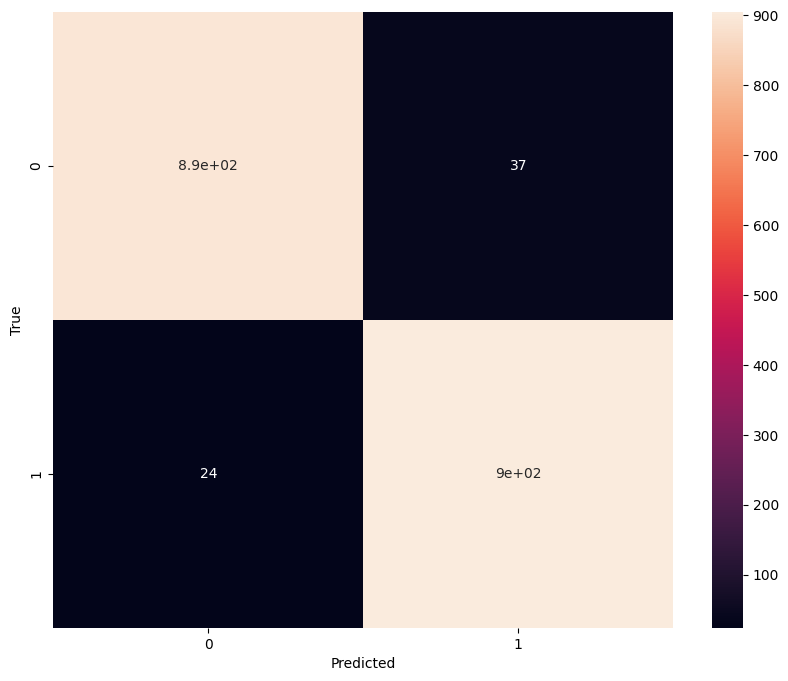

In [ ]:
# Fitting the model with the oversampled data and predicting Seen Data
clf_rf_ref = RandomForestClassifier(n_estimators=200)
clf_rf_ref = clf_rf_ref.fit(X_sample,y_sample)
y_pred = cross_val_predict(clf_rf_ref, X_sample2, y_sample2, cv=cv)
print('Evaluation of Final Random Forest Model for predicting A Stroke')
EvaluationOfFinalModel(y_pred, y_sample2)
